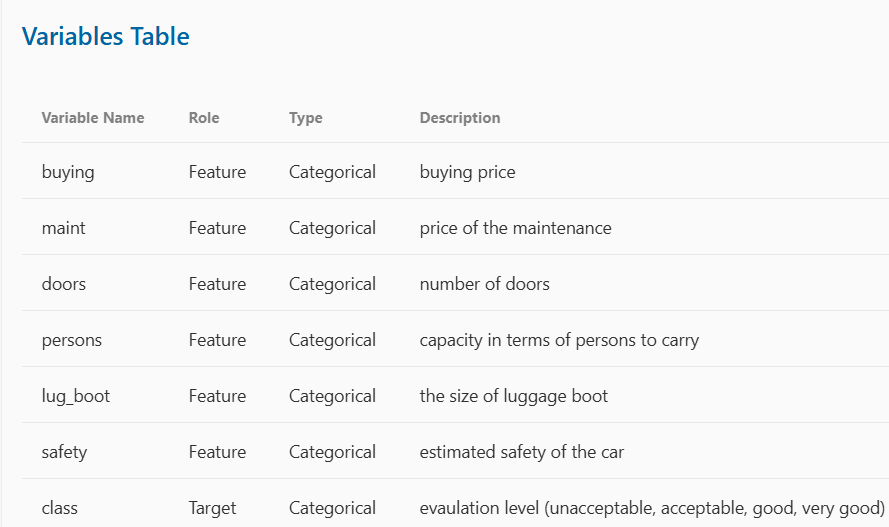

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv('car_evaluation.csv',header=None) # in data there is no header
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [36]:
# Let's create header to the DF
name=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=name

In [37]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [38]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [41]:
for i in df.columns:
    print(df[i].unique())
    print()
    print('************************************')

['vhigh' 'high' 'med' 'low']

************************************
['vhigh' 'high' 'med' 'low']

************************************
['2' '3' '4' '5more']

************************************
['2' '4' 'more']

************************************
['small' 'med' 'big']

************************************
['low' 'med' 'high']

************************************
['unacc' 'acc' 'vgood' 'good']

************************************


In [42]:
df['class'].value_counts(normalize=True)

class
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64

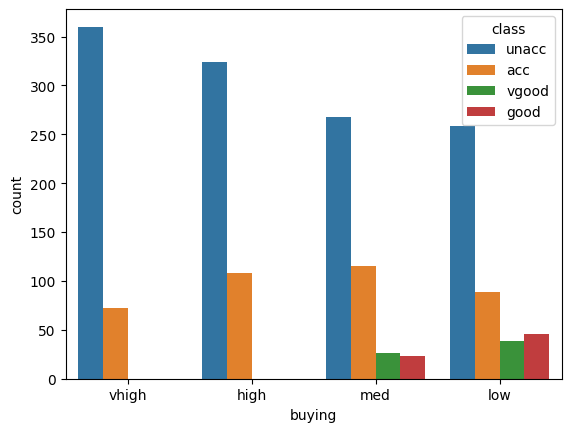

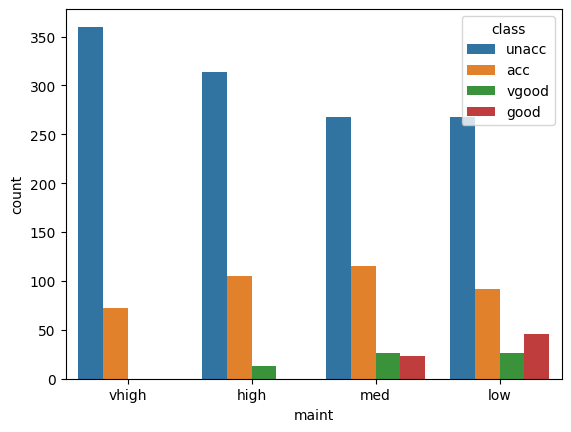

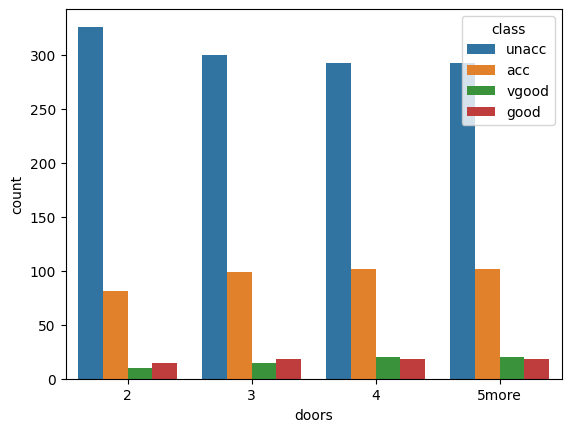

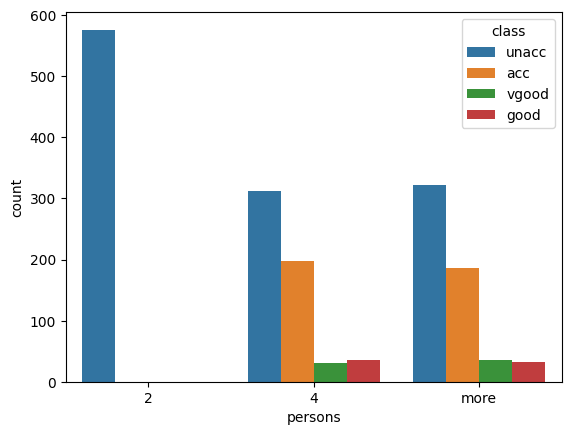

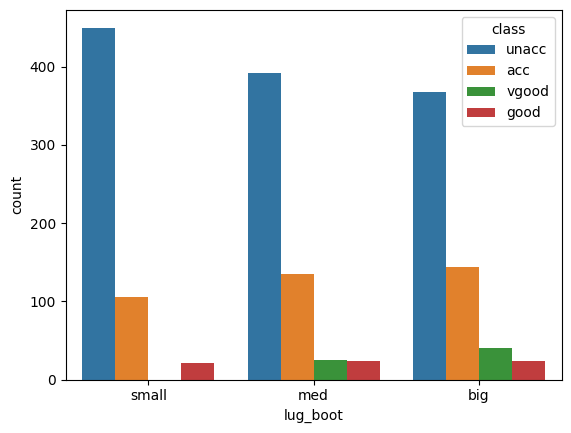

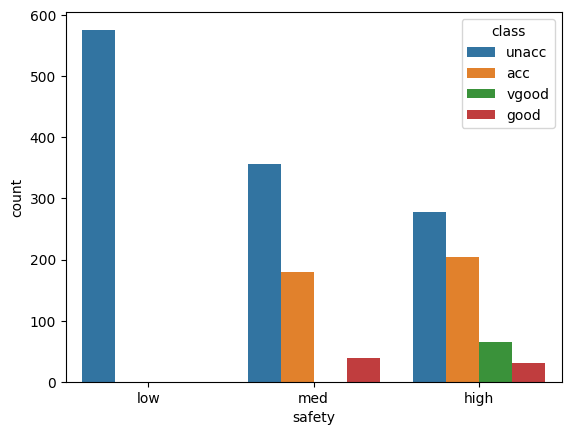

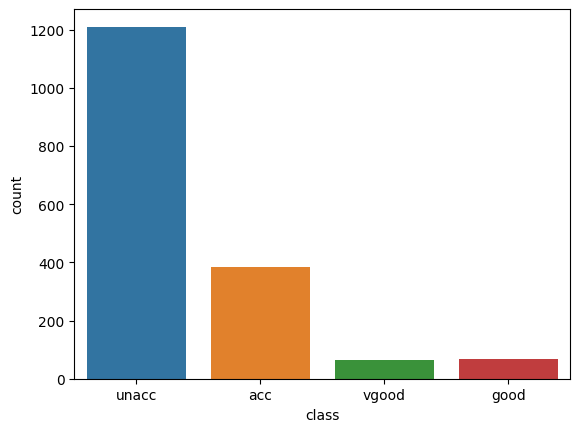

In [43]:
for i in df.columns:
    sns.countplot(data=df,x=i,hue='class')
    plt.show()

### The data is highly imbalanced

# Encoding -Label encoding

##### When we use Label encoding we should not use algo like Logit, knn etc coz these r based on weights and distance

In [44]:
X=df.drop('class',axis=1)
Y=df['class']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in X.columns:
    X[i]=encoder.fit_transform(X[i])
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1) # stratify makes sure u r data proption is almost similar
print(X_train.shape,y_train.shape)

(1382, 6) (1382,)


### The data here is not on the same scale so we need to do feature scaling: better is 1st split the data then do scaling

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)   #in test

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=9,random_state=42)
dtree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

In [48]:
y_pred_train=dtree.predict(X_train_scaled)
y_pred_test=dtree.predict(X_test_scaled)

In [49]:
from sklearn.metrics import accuracy_score
print('Train: ',accuracy_score(y_train,y_pred_train))
print('Test: ',accuracy_score(y_test,y_pred_test))

Train:  0.9746743849493488
Test:  0.953757225433526


# Metrics


Classification Report:

               precision    recall  f1-score   support

         acc       0.91      0.91      0.91        77
        good       0.67      0.71      0.69        14
       unacc       0.99      1.00      0.99       242
       vgood       0.90      0.69      0.78        13

    accuracy                           0.95       346
   macro avg       0.87      0.83      0.84       346
weighted avg       0.95      0.95      0.95       346



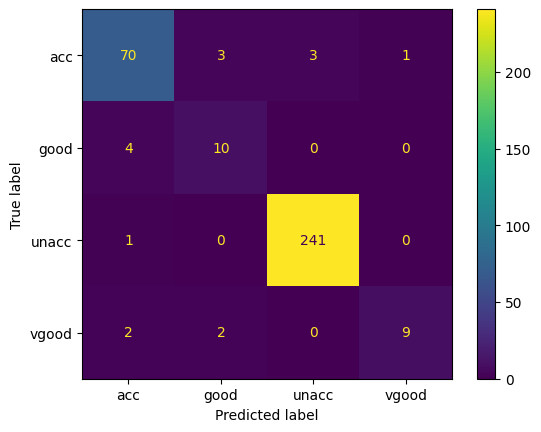

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
print('\nClassification Report:\n\n', classification_report(y_test, y_pred_test))

#### Even though accuracy is good this model is not good because look at the scores of vgood and good class This is becuse the data is imbalanced

# Ada Boost

Training Accuracy: 78.0 %
Testing Accuracy: 76.88 %

Classification Report:

               precision    recall  f1-score   support

         acc       0.66      0.40      0.50        77
        good       0.35      0.93      0.51        14
       unacc       0.85      0.87      0.86       242
       vgood       0.79      0.85      0.81        13

    accuracy                           0.77       346
   macro avg       0.66      0.76      0.67       346
weighted avg       0.79      0.77      0.76       346



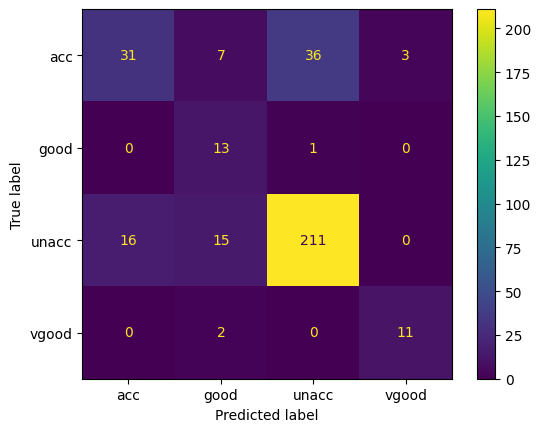

In [51]:
from sklearn.ensemble import AdaBoostClassifier
abclassifer = AdaBoostClassifier(random_state=42)
abclassifer.fit(X_train_scaled, y_train)
ab_train_score = round(abclassifer.score(X_train_scaled, y_train)*100, 2)
print('Training Accuracy:',ab_train_score , '%')

y_pred_ab = abclassifer.predict(X_test_scaled)
ab_test_score = round(accuracy_score(y_test, y_pred_ab)*100,2)
print('Testing Accuracy:', ab_test_score, '%')


cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ab)
print('\nClassification Report:\n\n', classification_report(y_test, y_pred_ab))

#### This is a horrible model. Thus AdaBoost is always not better

# Random Forest

Training Accuracy: 100.0 %
Testing Accuracy: 98.27 %

Classification Report:

               precision    recall  f1-score   support

         acc       0.94      0.99      0.96        77
        good       0.93      0.93      0.93        14
       unacc       1.00      0.99      1.00       242
       vgood       1.00      0.85      0.92        13

    accuracy                           0.98       346
   macro avg       0.97      0.94      0.95       346
weighted avg       0.98      0.98      0.98       346



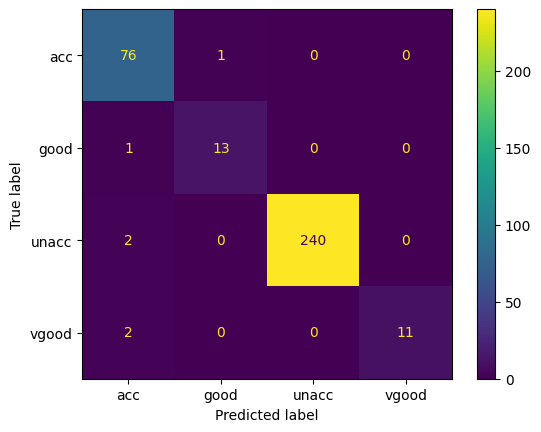

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfclassifer = RandomForestClassifier(n_estimators=101, criterion='entropy', random_state=42)
rfclassifer.fit(X_train_scaled, y_train)
rf_train_score = round(rfclassifer.score(X_train_scaled, y_train)*100, 2)
print('Training Accuracy:',rf_train_score , '%')

y_pred_rf = rfclassifer.predict(X_test_scaled)
rf_test_score = round(accuracy_score(y_test, y_pred_rf)*100,2)
print('Testing Accuracy:', rf_test_score, '%')

# metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print('\nClassification Report:\n\n', classification_report(y_test, y_pred_rf))

### Overfitting problem

# Feature importance

In [54]:
rfclassifer.feature_importances_

array([0.18782952, 0.14876883, 0.06505711, 0.22531874, 0.09365213,
       0.27937367])

In [57]:
X.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [66]:
features=pd.DataFrame(rfclassifer.feature_importances_,index=X.columns,columns=['Rank'])
features.sort_values(by='Rank',ascending=False)

,Rank
safety,0.279374
persons,0.225319
buying,0.187830
maint,0.148769
lug_boot,0.093652
doors,0.065057
